<a href="https://colab.research.google.com/github/issacridhin/LabWorks/blob/DL/2348546_DL_CIA2_Retest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First Question**

You are the manager of an e-commerce platform, and you want to optimize the pricing strategy for a specific product based on real-time data. Your objective is to maximize revenue while minimizing the cost of shipping the product to customers. Assume the revenue function is given by ƒ (w) = -0.2w2+50w -200 w is the price of the product, and the cost function for shipping is g (w) = 0.1w2-10w +100.You want to find the optimal price w using a momentum-based optimization algorithm.

In [60]:
#importing packages
import numpy as np

In [61]:
# Defining the revenue function f(w) and the shipping cost function g(w)
def revenue(w):
    return -0.2 * w**2 + 50 * w - 200

def shipping_cost(w):
    return 0.1 * w**2 - 10 * w + 100

In [67]:
# Define the objective function h(w) as the difference between revenue and shipping cost
def objective_function(w):
    return revenue(w) - shipping_cost(w)

# Define the gradient of the objective function
def gradient(w):
    return -0.6 * w + 60

In [63]:
# Momentum-based optimization algorithm
def momentum_optimization(w0, learning_rate, momentum_term, num_iterations):
    w = w0  # Initial price
    v = 0  # Initialize velocity
    for i in range(num_iterations):
        grad = gradient(w)
        v = momentum_term * v - learning_rate * grad  # Updating the velocity with momentum
        w += v  # Updating The price with velocity
    return w

In [64]:
# Parameters Chosen
initial_price = 100  # Initial price
learning_rate = 0.01  # LR
momentum = 0.9  # Momentum
iterations = 1000  # Number of iterations


In [65]:
# Find the optimal price
optimal_price = momentum_optimization(initial_price, learning_rate, momentum, iterations)

# Calculate revenue and shipping cost at the optimal price
optimal_revenue = revenue(optimal_price)
optimal_shipping_cost = shipping_cost(optimal_price)

In [66]:
print("Optimal Price:", optimal_price)
print("Optimal Revenue:", optimal_revenue)
print("Optimal Shipping Cost:", optimal_shipping_cost)
print("The Net_Profit:", optimal_revenue - optimal_shipping_cost)

Optimal Price: 100.0
Optimal Revenue: 2800.0
Optimal Shipping Cost: 100.0
The Net_Profit: 2700.0


**Second Question**

As a data scientist specializing in deep learning, you're tasked with exploring and comparing various regularization techniques using artificial neural networks (ANN) for a classification task. You will experiment with different regularization methods to enhance the model's performance and generalize well on a simple dataset. Your objective is to analyze the effects of regularization techniques on the ANN's performance and identify the most effective method for improving accuracy and reducing overfitting.


In [68]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.regularizers import l1, l2, l1_l2

In [69]:
# Loading the dataset
dataset = pd.read_csv('/content/winequality-red.csv')

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [71]:
#To check for null values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [29]:
dataset.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [30]:
dataset.shape

(1599, 12)

In [72]:
# The quality column is the target variable for the wine quality dataset
X = dataset.drop('quality', axis=1)
y = dataset['quality']

In [73]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [74]:
# Standardize the features
#Since we have features with different units aand scale we going to standardise (Mean 0 and SD 1) improving convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
#Function to build model with different regularization techniques
def build_model(regularizer):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizer), #input layer
        Dense(512, activation='relu', kernel_regularizer=regularizer),
        Dense(512, activation='relu', kernel_regularizer=regularizer), #hidden layer
        Dense(1)#output layer
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [76]:
# Training and evaluation for L1 Regularization
#This will pass the argument to the build_model function that we have created
model_l1 = build_model(l1(0.01)) #lambda is 0.01
history_l1 = model_l1.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test), verbose=0)
test_loss_l1, test_mae_l1 = model_l1.evaluate(X_test_scaled, y_test)
print("Test Loss L1 Regularization:", test_loss_l1)
print("Test MAE L1 Regularization:", test_mae_l1)

13/13 [==============================] - 0s 4ms/step - loss: 5.7938 - mae: 0.5741
Test Loss L1 Regularization: 5.793837070465088
Test MAE L1 Regularization: 0.5740615129470825


In [77]:
# Training and evaluation for L2 Regularization
model_l2 = build_model(l2(0.01)) #Lambda value is 0.01
history_l2 = model_l2.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test), verbose=0)
test_loss_l2, test_mae_l2 = model_l2.evaluate(X_test_scaled, y_test)
print("Test Loss L2 Regularization:", test_loss_l2)
print("Test MAE L2 Regularization:", test_mae_l2)

13/13 [==============================] - 0s 3ms/step - loss: 3.6377 - mae: 0.5328
Test Loss L2 Regularization: 3.6376655101776123
Test MAE L2 Regularization: 0.5327965021133423


In [78]:
# Training and evaluation for Elastic Net Regularization
model_elastic_net = build_model(l1_l2(l1=0.01, l2=0.01))
history_elastic_net = model_elastic_net.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test), verbose=0)
test_loss_elastic_net, test_mae_elastic_net = model_elastic_net.evaluate(X_test_scaled, y_test)
print("Test Loss Elastic Net Regularization:", test_loss_elastic_net)
print("Test MAE Elastic Net Regularization:", test_mae_elastic_net)

13/13 [==============================] - 0s 7ms/step - loss: 4.9836 - mae: 0.5552
Test Loss Elastic Net Regularization: 4.9836201667785645
Test MAE Elastic Net Regularization: 0.5552442073822021


In [79]:
# Training and evaluation for Dropout Regularization
#dropout 0.3 means 30% of neurons will be dropped during trainning
model_dropout = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(1)
])
model_dropout.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_dropout = model_dropout.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test), verbose=0)
test_loss_dropout, test_mae_dropout = model_dropout.evaluate(X_test_scaled, y_test)
print("Test Loss with Dropout Regularization:", test_loss_dropout)
print("Test MAE with Dropout Regularization:", test_mae_dropout)


13/13 [==============================] - 0s 5ms/step - loss: 0.7230 - mae: 0.6557
Test Loss with Dropout Regularization: 0.7230437397956848
Test MAE with Dropout Regularization: 0.6557159423828125


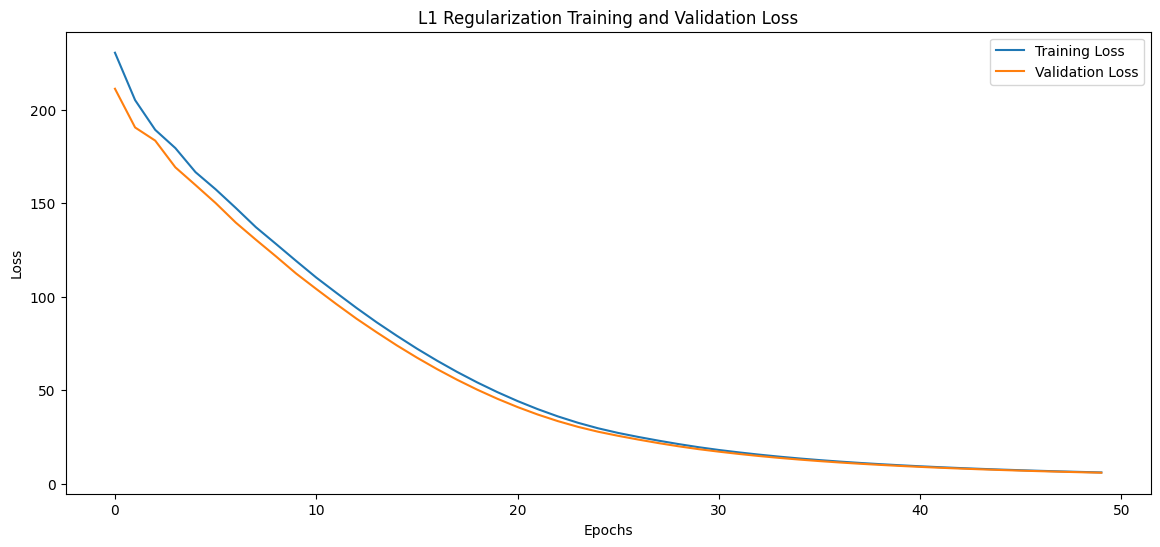

In [80]:
# Plot loss for L1 Regularization
plt.figure(figsize=(14, 6))
plt.plot(history_l1.history['loss'], label='Training Loss')
plt.plot(history_l1.history['val_loss'], label='Validation Loss')
plt.title('L1 Regularization Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

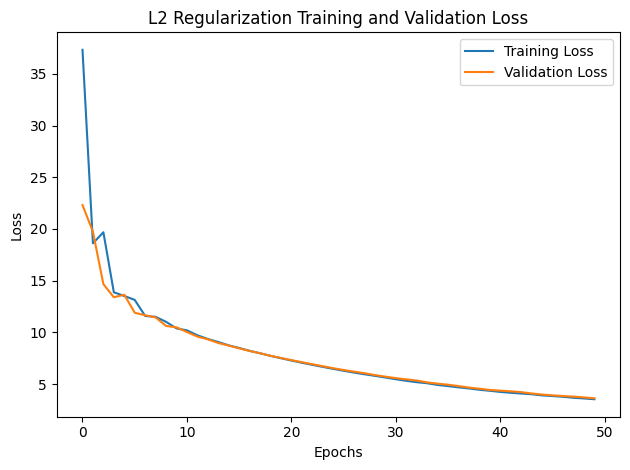

In [81]:
# Plot loss for L2 Regularization
plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('L2 Regularization Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


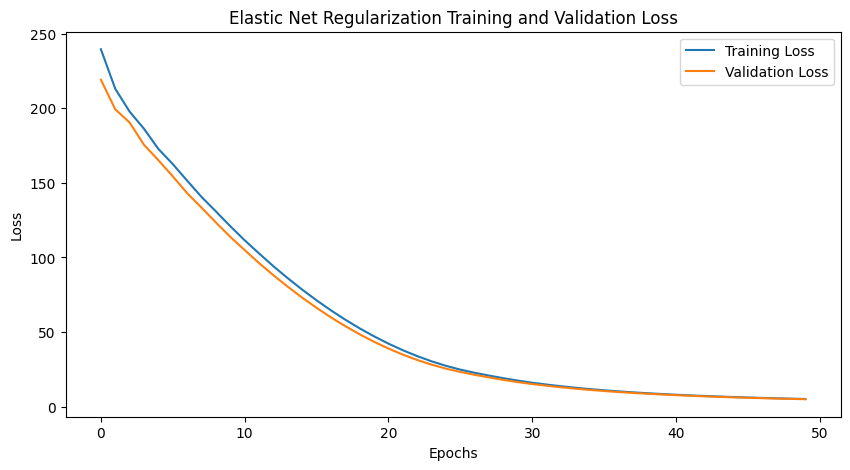

In [82]:
# Plot loss for Elastic Net Regularization
plt.figure(figsize=(10, 5))
plt.plot(history_elastic_net.history['loss'], label='Training Loss')
plt.plot(history_elastic_net.history['val_loss'], label='Validation Loss')
plt.title('Elastic Net Regularization Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

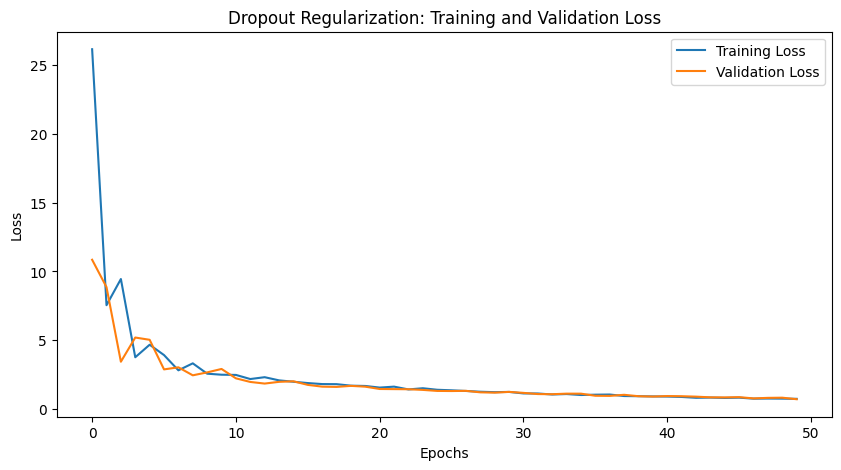

In [83]:
# Plot loss for Dropout Regularization
plt.figure(figsize=(10, 5))
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Dropout Regularization: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

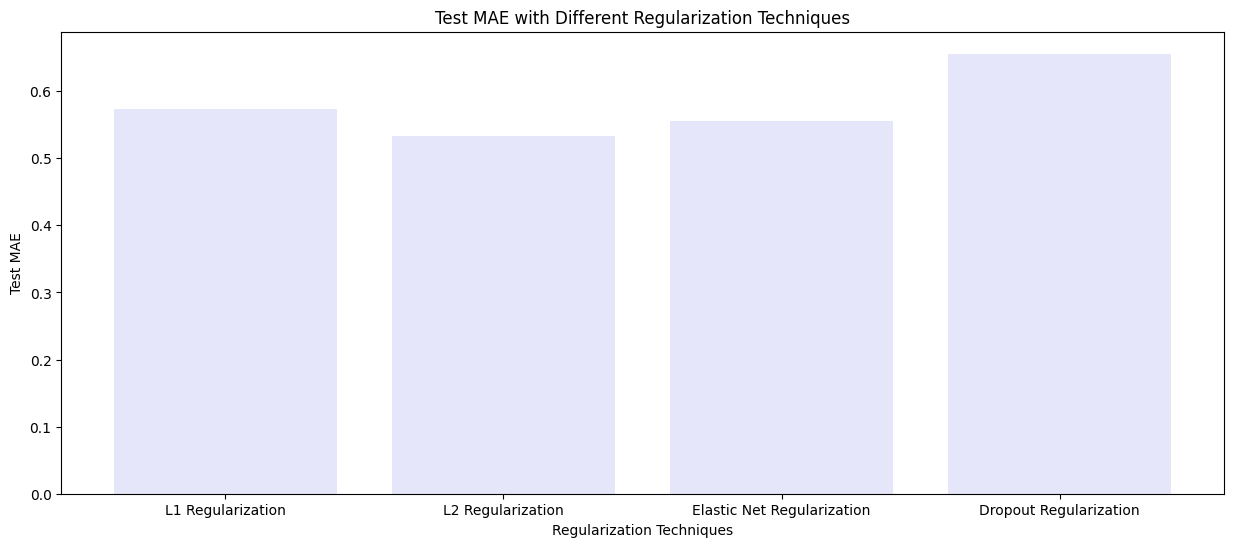

In [84]:
# Bar chart for comparing test MAE of different regularization techniques
plt.figure(figsize=(15, 6))
techniques = ['L1 Regularization', 'L2 Regularization', 'Elastic Net Regularization', 'Dropout Regularization']
test_maes = [test_mae_l1, test_mae_l2, test_mae_elastic_net, test_mae_dropout]
plt.bar(techniques, test_maes, color='lavender')
plt.title('Test MAE with Different Regularization Techniques')
plt.xlabel('Regularization Techniques')
plt.ylabel('Test MAE')
plt.show()

**Inference**

Among the tested regularization techniques, L2 regularization performs the best in terms of both test loss and test MAE, followed by Elastic Net regularization.

Dropout regularization performs relatively lower when compared to L2 and Elastic Net regularization, but it still outperforms L1 regularization.